In [44]:
import torch
import csv
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\jpresman\cernbox\Documents\Projects\ML_Pipeline")

%matplotlib inline

## Download Dataset

In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/new-york-housing-market")

print(f"Dataset downloaded at {path}"   )


Dataset downloaded at C:\Users\jpresman\.cache\kagglehub\datasets\nelgiriyewithana\new-york-housing-market\versions\1


# Explore data

In [46]:
df = pd.read_csv(r"./data/raw/NY-House-Dataset.csv")

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [48]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


## Raw Feature

### Null Values

In [49]:
df.isnull().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

### Distribution of numerical features

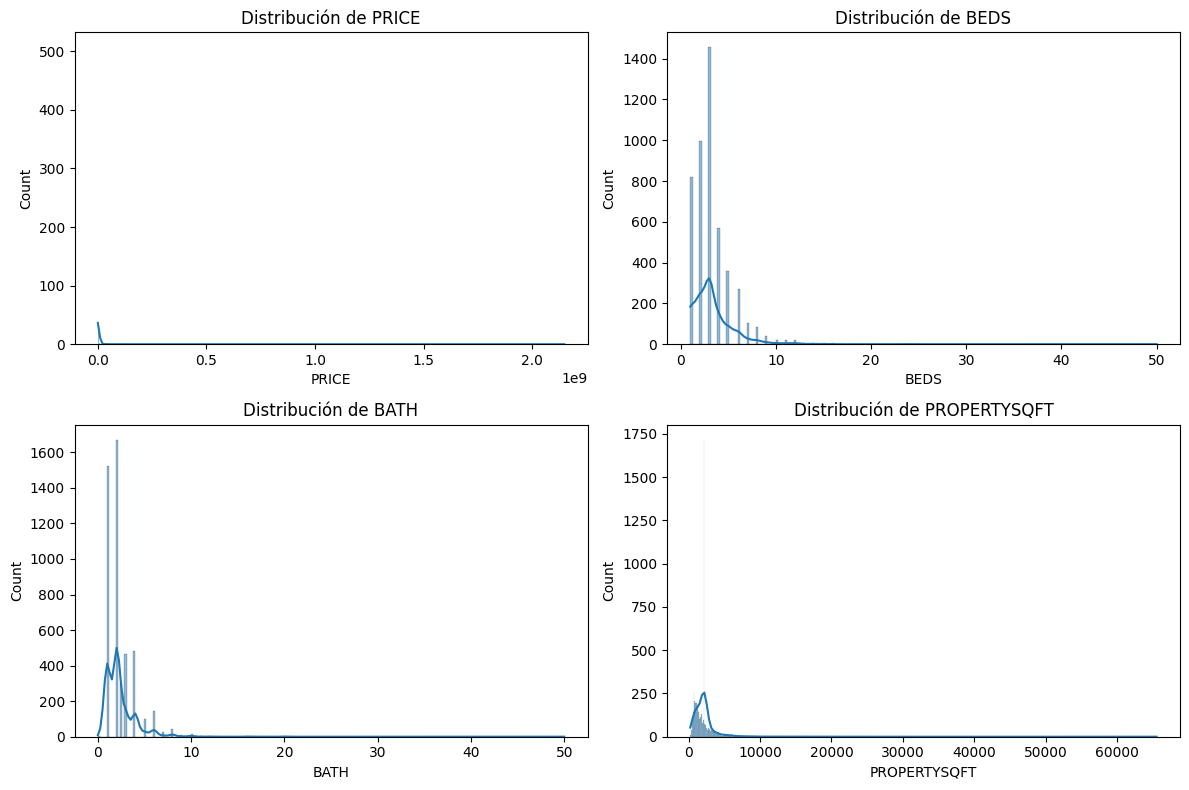

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de PRICE')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de BEDS')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de BATH')

sns.histplot(df['PROPERTYSQFT'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de PROPERTYSQFT')

plt.tight_layout()
plt.show()

### Outliers in numerical features

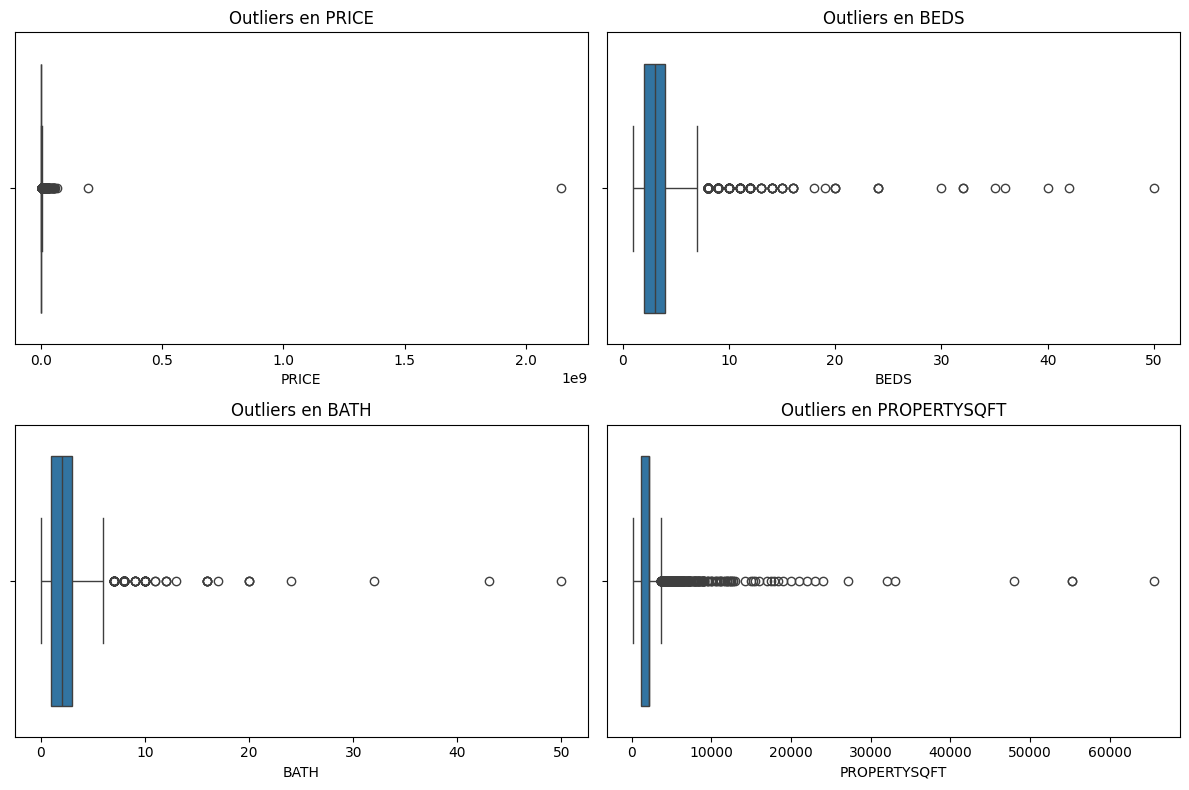

In [51]:
features = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Outliers en {feature}')

plt.tight_layout()
plt.show()

In [52]:
# Print median and IQR for each numerical feature
for feature in features:
    median = df[feature].median()
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    # Print median and limits 
    print(f""""Feature {feature}:
            Median: {median}
            Q1: {q1}
            Q3: {q3}
            IQR: {iqr}
            Lower limit: {q1 - 1.5 * iqr}
            Upper limit: {q3 + 1.5 * iqr}
          """)

"Feature PRICE:
            Median: 825000.0
            Q1: 499000.0
            Q3: 1495000.0
            IQR: 996000.0
            Lower limit: -995000.0
            Upper limit: 2989000.0
          
"Feature BEDS:
            Median: 3.0
            Q1: 2.0
            Q3: 4.0
            IQR: 2.0
            Lower limit: -1.0
            Upper limit: 7.0
          
"Feature BATH:
            Median: 2.0
            Q1: 1.0
            Q3: 3.0
            IQR: 2.0
            Lower limit: -2.0
            Upper limit: 6.0
          
"Feature PROPERTYSQFT:
            Median: 2184.207862
            Q1: 1200.0
            Q3: 2184.207862
            IQR: 984.2078620000002
            Lower limit: -276.3117930000003
            Upper limit: 3660.5196550000005
          


We can find some outliers in the numertical features, for example, some houses with + 50 BEDS or BATHS.

### Correlation Matrix

In [53]:
num_vars = ["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]
corr_matrix = df[num_vars].corr(method="pearson")
print(corr_matrix)

                 PRICE      BEDS      BATH  PROPERTYSQFT
PRICE         1.000000  0.052189  0.079371      0.110889
BEDS          0.052189  1.000000  0.776447      0.420503
BATH          0.079371  0.776447  1.000000      0.483935
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000


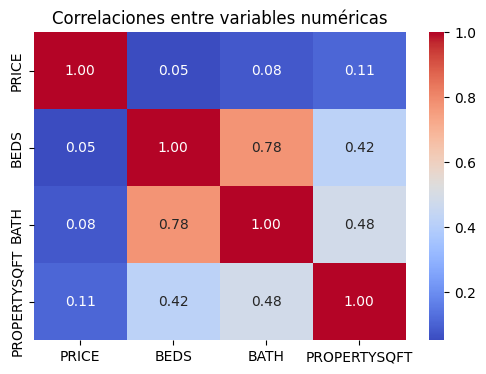

In [54]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

We can find a low correlation between some features, such as BEDS and PRICE

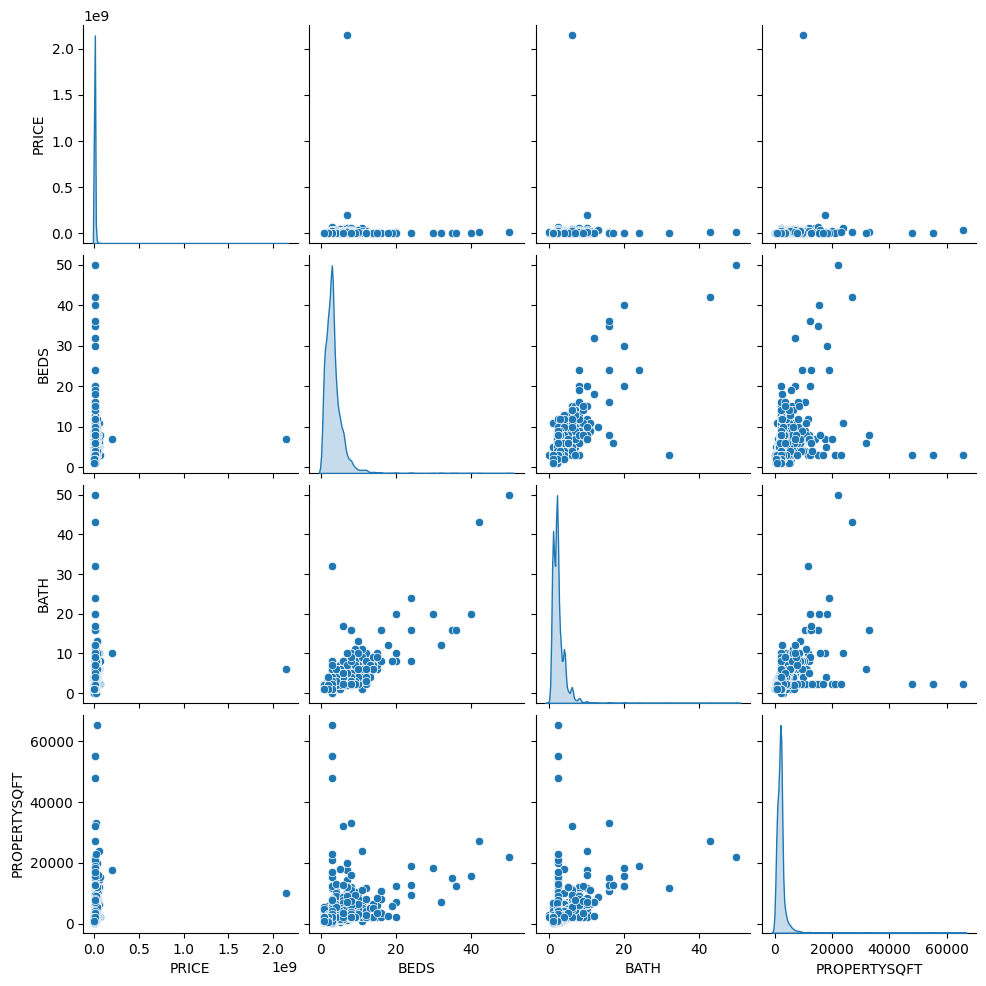

In [55]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.show()

## Clean Up

#### Filter Price and PropertySqft outliers

Transform prices to log scale

In [56]:
df["PRICE_LOG"] = np.log1p(df["PRICE"])
df["SQFT_LOG"] = np.log1p(df["PROPERTYSQFT"])

original_df = df.copy()

##### Price

In [57]:
n_total = len(df)

price_log_q1 = original_df["PRICE_LOG"].quantile(0.25)
price_log_q3 = original_df["PRICE_LOG"].quantile(0.75)
price_log_iqr = price_log_q3 - price_log_q1

upper_limit_price_log = price_log_q3 + 1.5 * price_log_iqr

df = df[df["PRICE_LOG"] <= upper_limit_price_log]

n_after = len(df)

removed = n_total - n_after
print(f"Removed {n_total - n_after} outliers based on PRICE ({removed / n_total:.2%} of total)")
print(f"Removed houses with PRICE_LOG above {upper_limit_price_log:.2f} -> PRICE above {np.expm1(upper_limit_price_log):.2f}")

Removed 206 outliers based on PRICE (4.29% of total)
Removed houses with PRICE_LOG above 15.86 -> PRICE above 7752674.10


##### SQFT

In [58]:
sqft_log_q1 = original_df["SQFT_LOG"].quantile(0.25)
sqft_log_q3 = original_df["SQFT_LOG"].quantile(0.75)
sqft_log_iqr = sqft_log_q3 - sqft_log_q1
upper_limit_sqft_log = sqft_log_q3 + 1.5 * sqft_log_iqr
df = df[df["SQFT_LOG"] <= upper_limit_sqft_log]
n_after = len(df)

removed = n_total - n_after
print(f"Removed {n_total - n_after} outliers based on SQFT ({removed / n_total:.2%} of total)")
print(f"Removed houses with SQFT_LOG above {upper_limit_sqft_log:.2f} -> SQFT above {np.expm1(upper_limit_sqft_log):.2f}")

Removed 292 outliers based on SQFT (6.08% of total)
Removed houses with SQFT_LOG above 8.59 -> SQFT above 5362.12


#### Filter BEDS and BATHS outliers

##### BEDS

In [59]:
# before_filtering
n_total = len(df)

beds_q1 = original_df["BEDS"].quantile(0.25)
beds_q3 = original_df["BEDS"].quantile(0.75)
beds_iqr = beds_q3 - beds_q1
upper_limit_beds = beds_q3 + 1.5 * beds_iqr

df = df[df["BEDS"] <= upper_limit_beds]

n_after = len(df)

removed = n_total - n_after

print(f"Removed {n_total - n_after} outliers based on BEDS ({removed / n_total:.2%} of total)")
print(f"Removed houses with BEDS above {upper_limit_beds} beds")

Removed 156 outliers based on BEDS (3.46% of total)
Removed houses with BEDS above 7.0 beds


##### BATHS

In [60]:
# before_filtering
n_total = len(df)

beds_q1 = original_df["BATH"].quantile(0.25)
beds_q3 = original_df["BATH"].quantile(0.75)
beds_iqr = beds_q3 - beds_q1
upper_limit_beds = beds_q3 + 1.5 * beds_iqr

df = df[df["BATH"] <= upper_limit_beds]

n_after = len(df)

removed = n_total - n_after

print(f"Removed {n_total - n_after} outliers based on BATHS ({removed / n_total:.2%} of total)")
print(f"Removed houses with BATHS above {upper_limit_beds} beds")

Removed 9 outliers based on BATHS (0.21% of total)
Removed houses with BATHS above 6.0 beds


### Distribution of numerical features

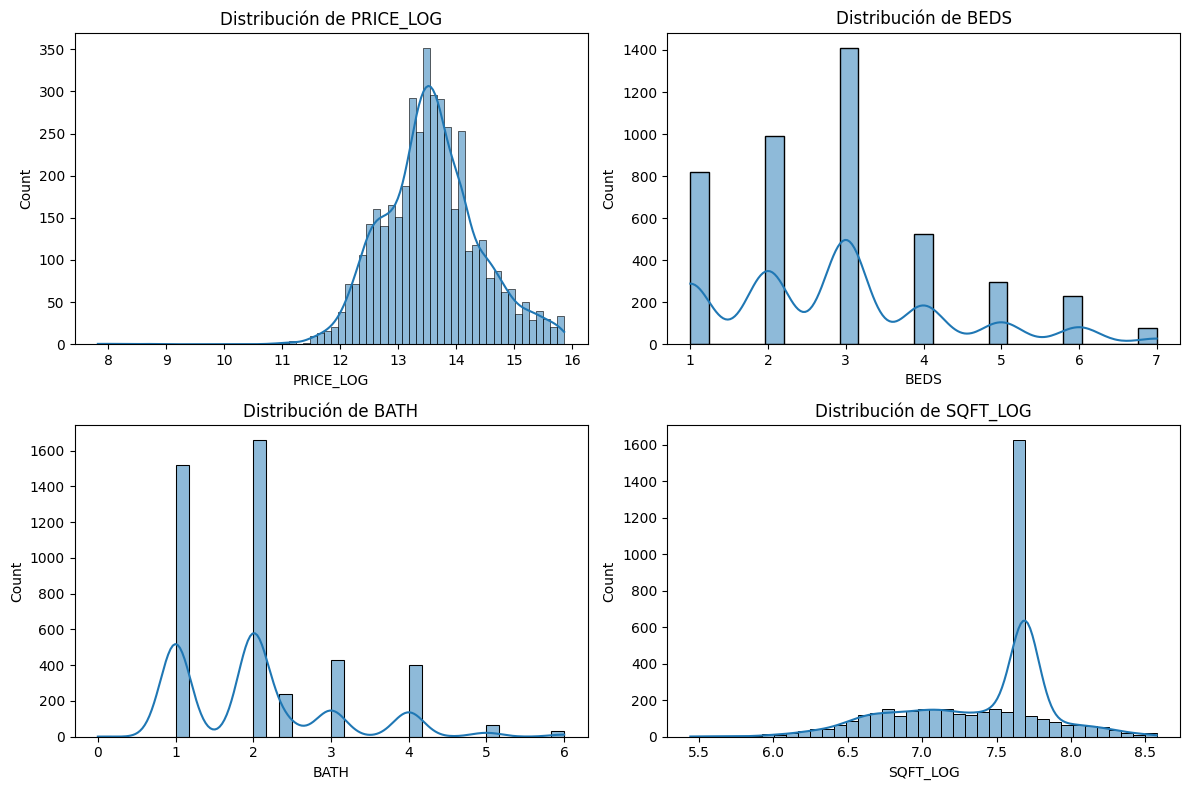

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df['PRICE_LOG'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de PRICE_LOG')

sns.histplot(df['BEDS'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de BEDS')

sns.histplot(df['BATH'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de BATH')

sns.histplot(df['SQFT_LOG'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de SQFT_LOG')

plt.tight_layout()
plt.show()

### Correlation Matrix

In [62]:
num_vars = ["PRICE_LOG", "BEDS", "BATH", "SQFT_LOG"]
corr_matrix = df[num_vars].corr(method="pearson")  # Pearson es lo más común
print(corr_matrix)

           PRICE_LOG      BEDS      BATH  SQFT_LOG
PRICE_LOG   1.000000  0.427653  0.604093  0.463708
BEDS        0.427653  1.000000  0.674086  0.473194
BATH        0.604093  0.674086  1.000000  0.497282
SQFT_LOG    0.463708  0.473194  0.497282  1.000000


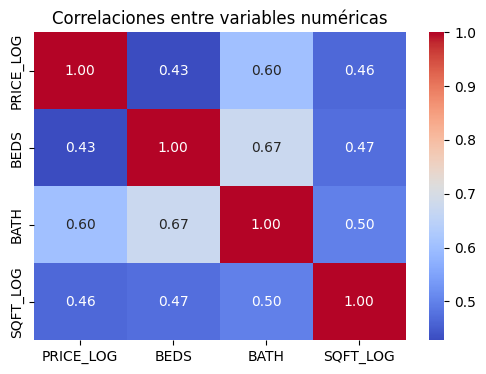

In [63]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

After cleaning up the data, we can see some interesting correlations:

1. PRICE and BEDS is 0.43, so its worst than BATHS for predicting PRICE
2. BEDS and BATHS is 0.67, so they are quite correlated


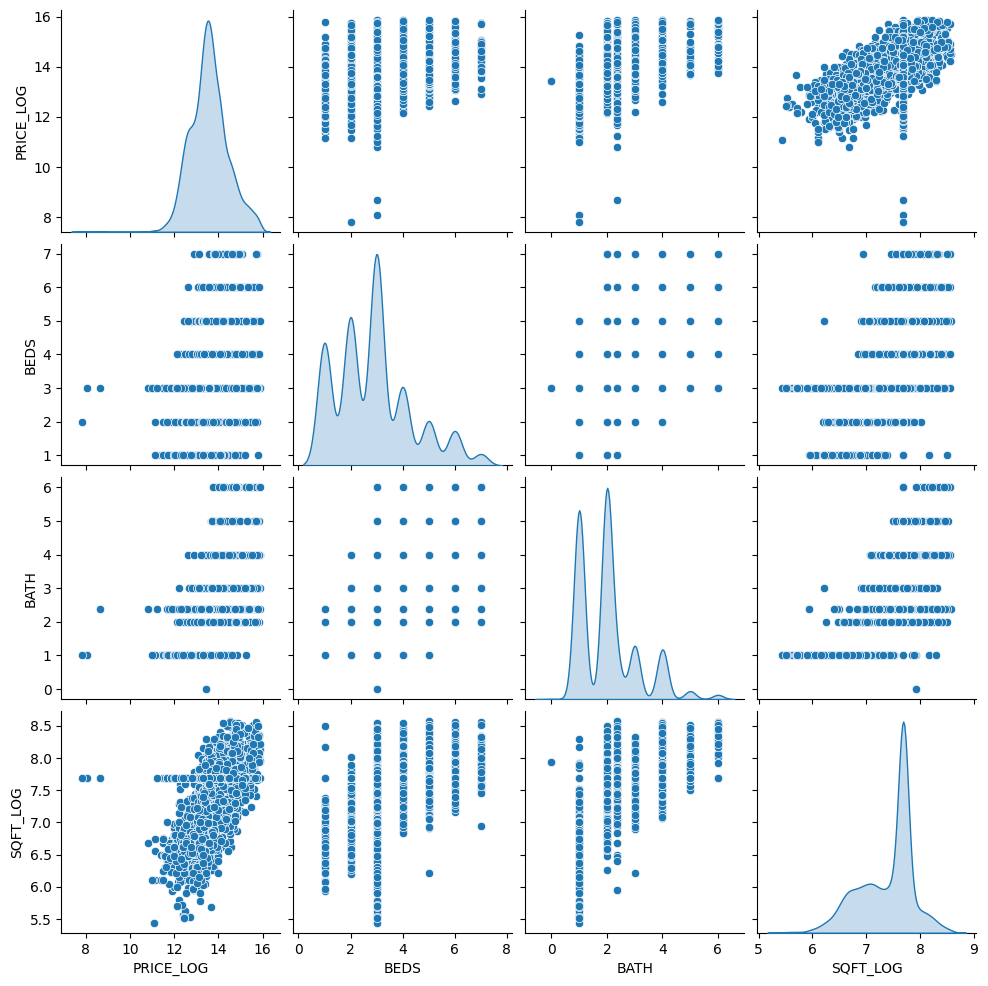

In [64]:
sns.pairplot(df[num_vars], diag_kind="kde")
plt.show()

# Fature Engineering

## Extraction

In [65]:
def feature_summary(series: pd.Series, name: str = None):
    """Genera un resumen bonito para evaluar la calidad de una feature"""
    q1 = series.quantile(0.25)
    q2 = series.median()
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    outliers = ((series < lower_whisker) | (series > upper_whisker)).sum()
    total = series.count()
    
    print(f"\n📦 Feature Summary: {name if name else series.name}")
    print(f"Count: {total}")
    print(f"Mean: {series.mean():.5f}")
    print(f"Median (Q2): {q2:.5f}")
    print(f"Q1 (25th percentile): {q1:.5f}")
    print(f"Q3 (75th percentile): {q3:.5f}")
    print(f"IQR: {iqr:.5f}")
    print(f"Lower whisker: {lower_whisker:.5f}")
    print(f"Upper whisker: {upper_whisker:.5f}")
    print(f"Min: {series.min():.5f}")
    print(f"Max: {series.max():.5f}")
    print(f"Outliers detected: {outliers} ({100*outliers/total:.5f}%)")


### Structural Features

Describe the structural and physical characteristics of the property.


#### Price per sqft

In [66]:
df["PRICE_PER_SQFT"] = df["PRICE"] / df["PROPERTYSQFT"]

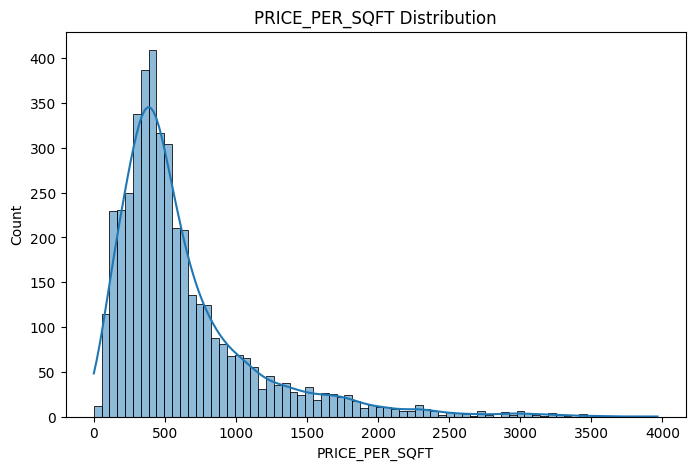

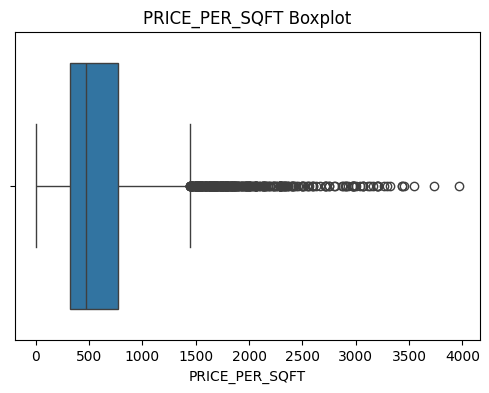

In [67]:
# Histogram and KDE plot for PRICE_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['PRICE_PER_SQFT'], kde=True)
plt.title('PRICE_PER_SQFT Distribution')
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PRICE_PER_SQFT"])
plt.title('PRICE_PER_SQFT Boxplot')
plt.show()

In [68]:
feature_summary(df["PRICE_PER_SQFT"], "PRICE_PER_SQFT")


📦 Feature Summary: PRICE_PER_SQFT
Count: 4344
Mean: 629.67719
Median (Q2): 468.33640
Q1 (25th percentile): 318.19316
Q3 (75th percentile): 767.75512
IQR: 449.56196
Lower whisker: -356.14978
Upper whisker: 1442.09806
Min: 1.14183
Max: 3965.83282
Outliers detected: 336 (7.73481%)


#### Beds per sqft

In [69]:
df["BEDS_PER_SQFT"] = df["BEDS"] / df["PROPERTYSQFT"]

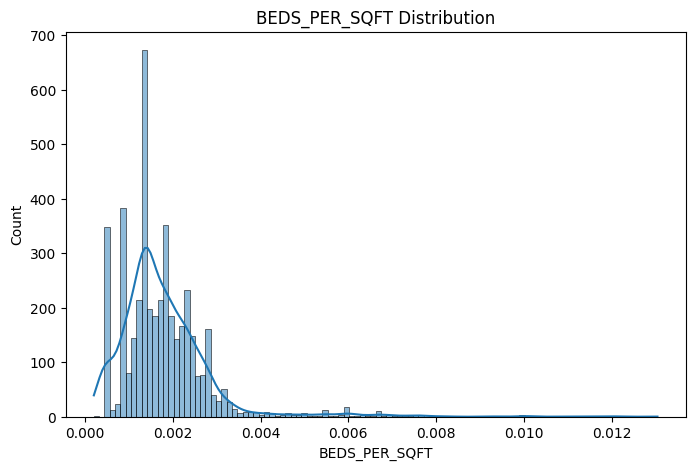

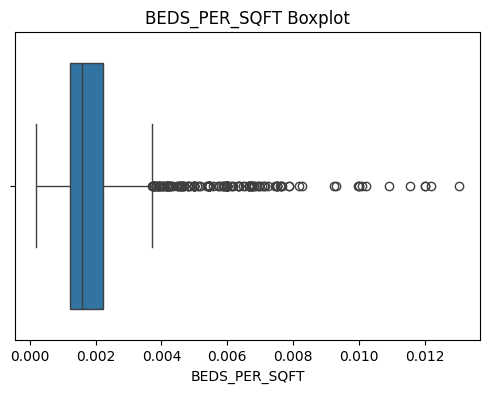

In [70]:
# Histogram and KDE plot for BEDS_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['BEDS_PER_SQFT'], kde=True)
plt.title('BEDS_PER_SQFT Distribution')
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df["BEDS_PER_SQFT"])
plt.title('BEDS_PER_SQFT Boxplot')
plt.show()

In [71]:
feature_summary(df["BEDS_PER_SQFT"], "BEDS_PER_SQFT")


📦 Feature Summary: BEDS_PER_SQFT
Count: 4344
Mean: 0.00179
Median (Q2): 0.00159
Q1 (25th percentile): 0.00123
Q3 (75th percentile): 0.00222
IQR: 0.00099
Lower whisker: -0.00026
Upper whisker: 0.00371
Min: 0.00020
Max: 0.01304
Outliers detected: 155 (3.56814%)


#### BATHS per sqft

In [72]:
df["BATH_PER_SQFT"] = df["BATH"] / df["PROPERTYSQFT"]

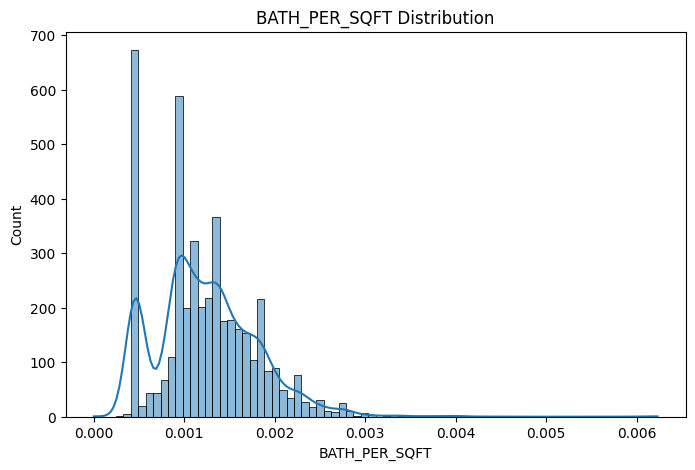

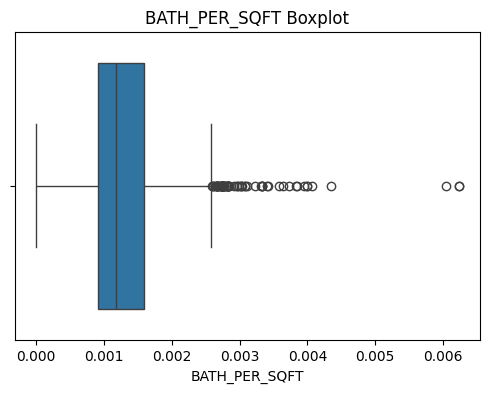

In [73]:
# Histogram and KDE plot for BATH_PER_SQFT
plt.figure(figsize=(8, 5))
sns.histplot(df['BATH_PER_SQFT'], kde=True)
plt.title('BATH_PER_SQFT Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["BATH_PER_SQFT"])
plt.title('BATH_PER_SQFT Boxplot')
plt.show()



In [74]:
feature_summary(df["BATH_PER_SQFT"], "BATH_PER_SQFT")


📦 Feature Summary: BATH_PER_SQFT
Count: 4344
Mean: 0.00124
Median (Q2): 0.00118
Q1 (25th percentile): 0.00092
Q3 (75th percentile): 0.00158
IQR: 0.00067
Lower whisker: -0.00009
Upper whisker: 0.00259
Min: 0.00000
Max: 0.00623
Outliers detected: 77 (1.77256%)


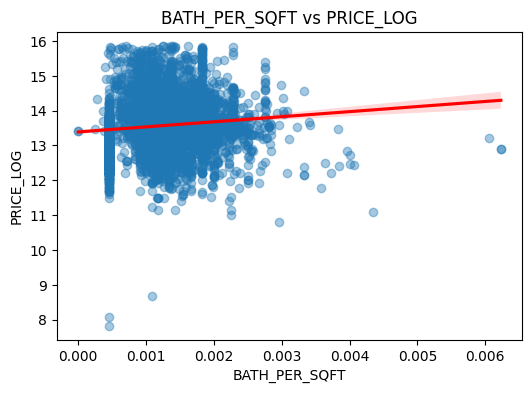

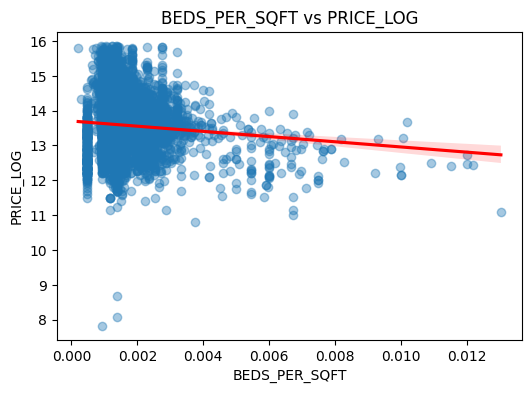

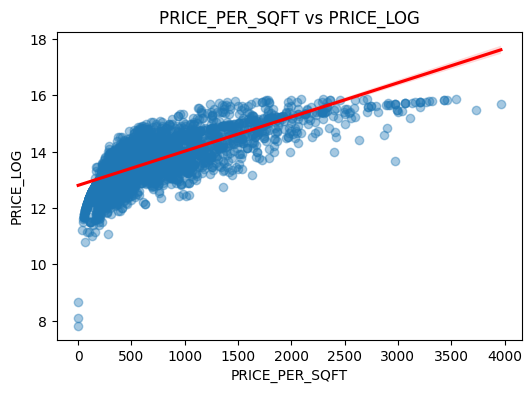

In [75]:

features = ["BATH_PER_SQFT", "BEDS_PER_SQFT", "PRICE_PER_SQFT"]

for f in features:
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[f], y=df["PRICE_LOG"], scatter_kws={"alpha":0.4}, line_kws={"color":"red"})
    plt.title(f"{f} vs PRICE_LOG")
    plt.show()

### Geospatial Features

Location-based features that capture the geographical context of the property.

#### Distance to Manhattan

In [76]:
lat_c, lon_c = 40.7831, -73.9712

df["DIST_TO_MANHATTAN"] = np.sqrt(
    (df["LATITUDE"] - lat_c) ** 2 + (df["LONGITUDE"] - lon_c) ** 2
)

#### Locality

In [77]:
# Definir top-N zonas
top_n = 10
top_localities = df["LOCALITY"].value_counts().nlargest(top_n).index

# Crear nueva columna
df["LOCALITY_GROUPED"] = df["LOCALITY"].apply(
    lambda x: x if x in top_localities else "Other"
)

print(df["LOCALITY_GROUPED"].value_counts())


LOCALITY_GROUPED
New York           2123
New York County     921
Queens County       556
Kings County        454
Bronx County        182
Richmond County      55
United States        35
Brooklyn              6
Queens                6
The Bronx             5
Other                 1
Name: count, dtype: int64


### Interaction Features

Combinations of existing features that may capture more complex relationships.

In [78]:
df["BEDS_TIMES_BATH"] = df["BEDS"] * df["BATH"]

df["SQFT_TIMES_DISTANCE"] = df["PROPERTYSQFT"] * df["DIST_TO_MANHATTAN"]

## Plotting

### Price per sqft plot

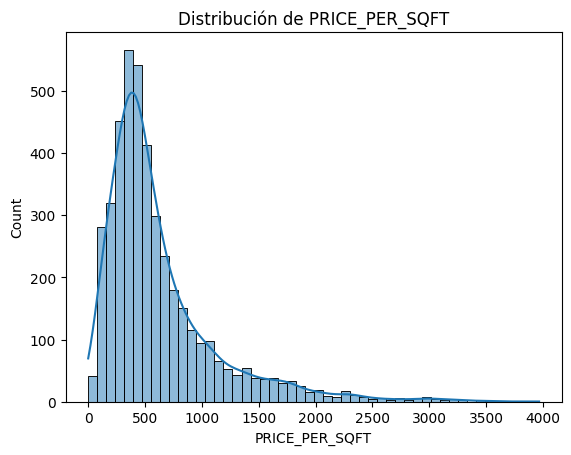

In [79]:
sns.histplot(df["PRICE_PER_SQFT"], bins=50, kde=True)
plt.title("Distribución de PRICE_PER_SQFT")
plt.show()

### Price per sqft vs locality

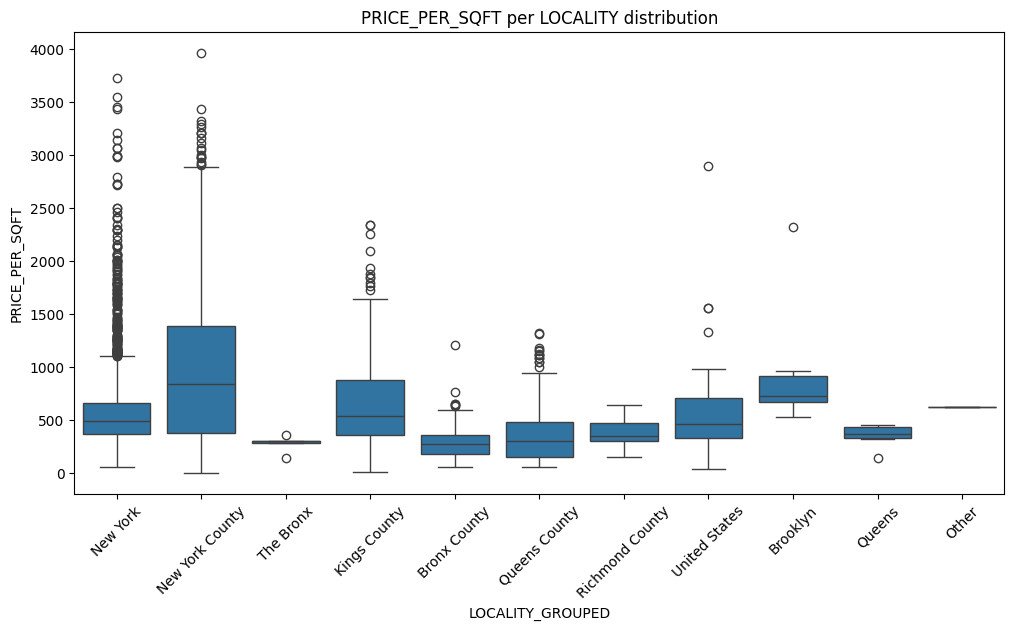

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(x="LOCALITY_GROUPED", y="PRICE_PER_SQFT", data=df)
plt.xticks(rotation=45)
plt.title("PRICE_PER_SQFT per LOCALITY distribution")
plt.show()

### Distance to Manhattan

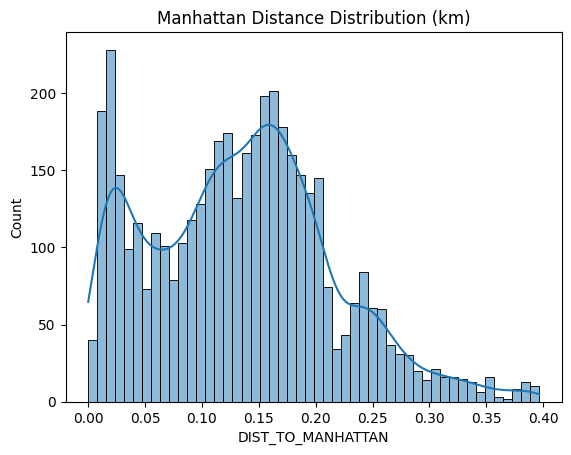

In [81]:
sns.histplot(df["DIST_TO_MANHATTAN"], bins=50, kde=True)
plt.title("Manhattan Distance Distribution (km)")
plt.show()

### Distance to manhattan vs price_log vs BEDS/BATHS

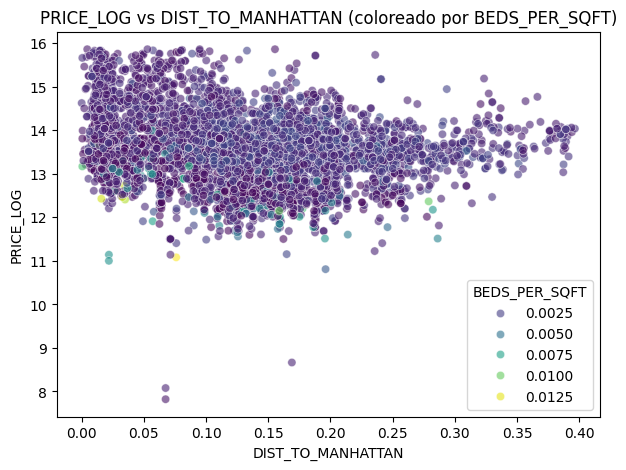

In [82]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="DIST_TO_MANHATTAN", 
    y="PRICE_LOG",
    hue="BEDS_PER_SQFT",  # o "BATH_PER_SQFT"
    palette="viridis",
    alpha=0.6
)
plt.title("PRICE_LOG vs DIST_TO_MANHATTAN (coloreado por BEDS_PER_SQFT)")
plt.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

fig = px.scatter_3d(
    df,
    x="DIST_TO_MANHATTAN",
    y="BEDS_PER_SQFT",  
    z="PRICE_LOG",
    color="PRICE_LOG",
    opacity=0.6
)

fig.show()


In [ ]:
import plotly.express as px
import plotly.io as pio

fig = px.scatter_3d(
    df,
    x="DIST_TO_MANHATTAN",
    y="BATH_PER_SQFT",  
    z="PRICE_LOG",
    color="PRICE_LOG",
    opacity=0.6
)

fig.show()


In [88]:
import plotly.express as px
import plotly.io as pio

fig = px.scatter_3d(
    df,
    x="DIST_TO_MANHATTAN",
    y="SQFT_LOG",  
    z="PRICE_LOG",
    color="PRICE_LOG",
    opacity=0.6
)

fig.show()

### Price log per location

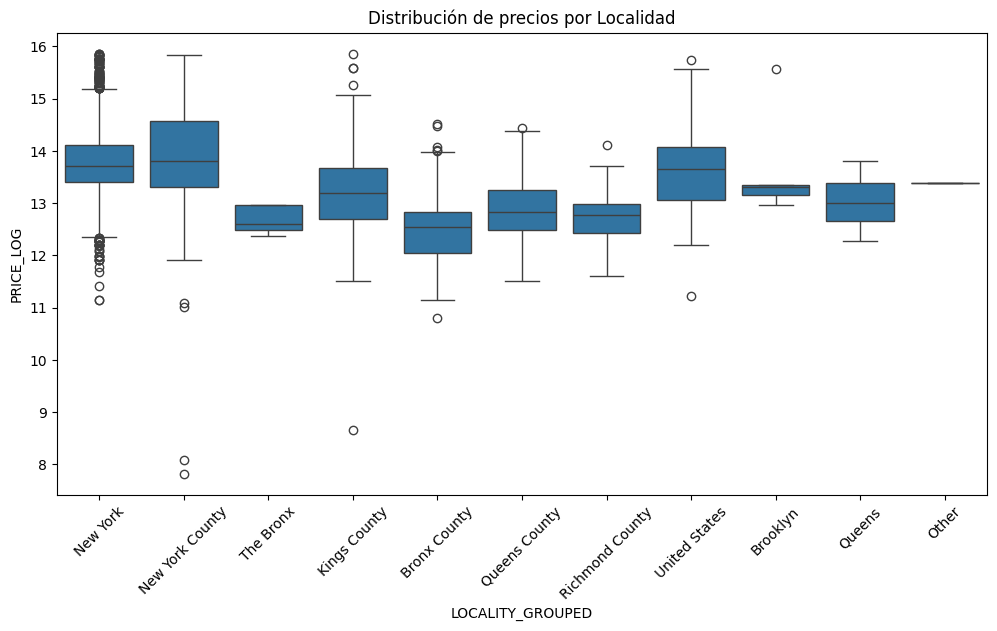

In [84]:
plt.figure(figsize=(12,6))
sns.boxplot(x="LOCALITY_GROUPED", y="PRICE_LOG", data=df)
plt.xticks(rotation=45)
plt.title("Distribución de precios por Localidad")
plt.show()


# Save cleaned dataset

In [85]:
df.to_csv(r"./data/processed/NY-House-Dataset-Cleaned.csv", index=False)